---
### *The 12th Computational Neuroscience Winter School*

# Tutorial II: Neuron software
---
__Date:__ Jan. 13, 2023

__Content Creator:__ Jingyang Ma, Ziling Wang, Kai Chen, Songting Li

# Tutorial Objectives

In this notebook, we'll learn how to use the Neuron software in python to build the biophysical neuron(or neuronal network) and do some simulations as we like. There are 4 sections in this tutorial:

1. Simulation of  a point neuron
1. Simulation of neuron with dendtrites
1. Simulation of neuronal network
1. Simulation of a real neuron from ModelDB

#### References:
- https://www.neuron.yale.edu/neuron/static/py_doc/index.html
- https://neuronaldynamics.epfl.ch
- https://senselab.med.yale.edu/ModelDB/
- Li, S., Liu, N., Zhang, X., Zhou, D., Cai, D. (2014) Bilinearity in spatiotemporal integration of synaptic inputs. PLoS Comput Biol.
- Li, S., Liu, N., Zhang, X., McLaughlin, D. W., Zhou, D., & Cai, D. (2019). Dendritic computations captured by an effective point neuron model. Proceedings of the National Academy of Sciences.
- Hay E, Hill S, Schürmann F, Markram H, Segev I (2011) Models of Neocortical Layer 5b Pyramidal Cells Capturing a Wide Range of Dendritic and Perisomatic Active Properties. PLoS Comput Biol.

# Section 4: Simulation of a real neuron from ModelDB

In [1]:
from neuron import h
from neuron.units import ms, mV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import gui

--No graphics will be displayed.


## Step 1: Download the neuron file from ModelDB

ModelDB(https://senselab.med.yale.edu/ModelDB/) is a website that provides an accessible location for storing and efficiently retrieving computational neuroscience models

![ModelDB](./pictures/ModelDB.png)

For example: if we want to use the biophysical neuron in **Hay, E.,et al., 2011. PLoS Comput. Biol.**(https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002107) We can search the first author on the website and find the neuron they use.(Most neuron models that is built by NEURON software can be found in ModelDB)

![ModelDB2](./pictures/ModelDB2.png)

After downloading the zip file, we can find the .mod and .hoc files. The .mod files define the ion channels they use in the model. The .hoc define the biophysical properties of the neuron and the simulation method

## Step 2: Load the .mod and .hoc file

Use **nrivmodl + file path** to load all the ion channels defined by the .mod files. If the ion channels are loaded succesfully, you can a **x86_64** file in your file folder

In [2]:
!nrnivmodl ./L5bPCmodelsEH/mod

/home/mjy/winter school 2023
ls: cannot access './L5bPCmodelsEH/mod/*.inc': No such file or directory
./L5bPCmodelsEH/mod/CaDynamics_E2.mod ./L5bPCmodelsEH/mod/Ca_HVA.mod ./L5bPCmodelsEH/mod/Ca_LVAst.mod ./L5bPCmodelsEH/mod/epsp.mod ./L5bPCmodelsEH/mod/Ih.mod ./L5bPCmodelsEH/mod/Im.mod ./L5bPCmodelsEH/mod/K_Pst.mod ./L5bPCmodelsEH/mod/K_Tst.mod ./L5bPCmodelsEH/mod/Nap_Et2.mod ./L5bPCmodelsEH/mod/NaTa_t.mod ./L5bPCmodelsEH/mod/NaTs2_t.mod ./L5bPCmodelsEH/mod/SK_E2.mod ./L5bPCmodelsEH/mod/SKv3_1.mod
CaDynamics_E2.mod Ca_HVA.mod Ca_LVAst.mod epsp.mod Ih.mod Im.mod K_Pst.mod K_Tst.mod Nap_Et2.mod NaTa_t.mod NaTs2_t.mod SK_E2.mod SKv3_1.mod
 -> Compiling mod_func.c
 -> NMODL CaDynamics_E2.mod
gcc -O2   -I. -I..   -I/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
MODLUNIT=/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
  /home/mjy/anaconda/envs

The morphology and biophysical properties are written in the HOC language. So we can use **h.load_file to load** the .hoc file we need.

In [3]:
h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "./L5bPCmodelsEH/morphologies/cell1.asc"
biophysicalModelFilename = "./L5bPCmodelsEH/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "./L5bPCmodelsEH/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)
L5PC = h.L5PCtemplate(morphologyFilename)

We can use **h.topology()** to check whether we load the neuron successfully.

In [4]:
h.topology()


|-|       L5PCtemplate[0].soma[0](0-1)
  `|       L5PCtemplate[0].dend[0](0-1)
    `|       L5PCtemplate[0].dend[1](0-1)
      `------|       L5PCtemplate[0].dend[2](0-1)
      `|       L5PCtemplate[0].dend[3](0-1)
        `----|       L5PCtemplate[0].dend[4](0-1)
        `--------|       L5PCtemplate[0].dend[5](0-1)
    `------|       L5PCtemplate[0].dend[6](0-1)
  `|       L5PCtemplate[0].dend[7](0-1)
    `|       L5PCtemplate[0].dend[8](0-1)
      `|       L5PCtemplate[0].dend[9](0-1)
      `--|       L5PCtemplate[0].dend[10](0-1)
    `|       L5PCtemplate[0].dend[11](0-1)
      `|       L5PCtemplate[0].dend[12](0-1)
        `------|       L5PCtemplate[0].dend[13](0-1)
        `------|       L5PCtemplate[0].dend[14](0-1)
      `--|       L5PCtemplate[0].dend[15](0-1)
  `|       L5PCtemplate[0].dend[16](0-1)
    `|       L5PCtemplate[0].dend[17](0-1)
      `|       L5PCtemplate[0].dend[18](0-1)
        `|       L5PCtemplate[0].dend[19](0-1)
        `|       L5PCtemplate[0].dend[20](

1.0

Or we can sketch the morphology of the neuron

In [6]:
ps = h.PlotShape(True)
ps.plot(plotly).show()

And we can use **.psection()** to check the neuron in detail.

In [7]:
L5PC.soma[0].psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [3.44e-05], 'e': [-90.0], 'i': [0.0]},
  'CaDynamics_E2': {'gamma': [0.000549],
   'decay': [486.0],
   'depth': [0.1],
   'minCai': [0.0001]},
  'Ca_HVA': {'gCa_HVAbar': [0.000567],
   'ica': [0.0],
   'gCa_HVA': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Ca_LVAst': {'gCa_LVAstbar': [0.00432],
   'ica': [0.0],
   'gCa_LVAst': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Ih': {'gIhbar': [0.0002], 'ihcn': [0.0], 'gIh': [0.0], 'm': [0.0]},
  'K_Pst': {'gK_Pstbar': [0.000547],
   'ik': [0.0],
   'gK_Pst': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'K_Tst': {'gK_Tstbar': [0.0326],
   'ik': [0.0],
   'gK_Tst': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Nap_Et2': {'gNap_Et2bar': [0.00496],
   'ina': [0.0],
   'gNap_Et2': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'NaTa_t': {'gNaTa_tbar': [1.71],
   'ina': [0.0],
   'gNaTa_t': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'SK_E2': {'gSK_E2bar': [0.0556], 'ik': [0.0], 'gSK_E2': [0.0], 'z': [0.0]},
  'SKv3_1'

## Step 3: Simulate the neuron as we like

We can also the **h.Vector** to record the time and voltage

In [8]:
soma_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
t = h.Vector().record(h._ref_t)

We can either simulate the neuron with a current input or a synaptic input

In [9]:
iclamp = h.IClamp(L5PC.soma[0](0.5))
iclamp.dur = 5
iclamp.delay = 10

stim = h.NetStim()
syn = h.ExpSyn(L5PC.soma[0](0.5))
syn.tau = 1
stim.number = 10
stim.interval = 5
stim.noise = 1
stim.start = 10
ncstim = h.NetCon(stim, syn)
ncstim.delay = 0 * ms

In [10]:
iclamp.amp = 2
ncstim.weight[0] = 0
h.v_init = -80
h.tstop = 100
h.run()

0.0

Text(0.5, 1.0, 'When the neuron receives a current input')

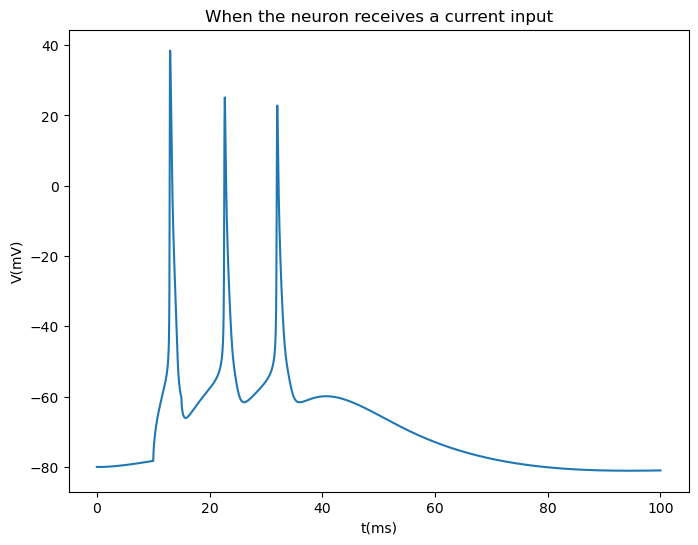

In [11]:
plt.figure(figsize=(8,6))
plt.plot(t, soma_v)
plt.xlabel('t(ms)')
plt.ylabel('V(mV)')
plt.title('When the neuron receives a current input')

In [12]:
iclamp.amp = 0
ncstim.weight[0] = 0.05
h.v_init = -80
h.tstop = 100
h.run()

0.0

Text(0.5, 1.0, 'When the neuron receives a synaptic input')

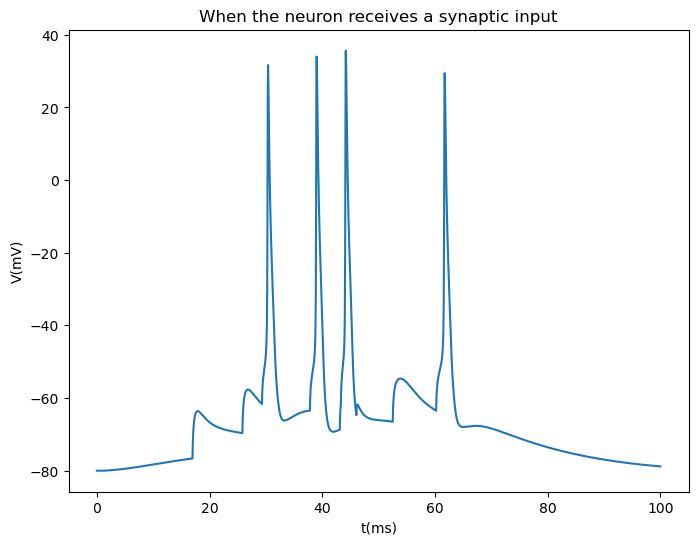

In [13]:
plt.figure(figsize=(8,6))
plt.plot(t, soma_v)
plt.xlabel('t(ms)')
plt.ylabel('V(mV)')
plt.title('When the neuron receives a synaptic input')

## Exercise 4(Advanced): Use the biophysical neuron model in https://github.com/LCNS-SJTU/DIF_model and check the bilinear rule.

![bilinear](./pictures/bilinear.png)

$$
V_S(t^*) = V_E(t^*)+V_I(t^*)+k*V_E(t^*)*V_I(t^*)

# End of tutorial